<div><center><img src="https://ml.ucv.ai/logo.png\" width=150"/> </center></div>



# 01 Regresión Lineal: Numpy vs Scikit-learn

- Derivando soluciones
- Usando Scikit-Learn

## Versión v.2
El notebook lo puedo modificar, esta versión es la v.1 a 24/05/2024 a l pm de Caracas.



Autor: Fernando Crema García
Contacto: fernando.cremagarcia@kuleuven.be; fernando.cremagarcia@esat.kuleuven.be

# Regresión lineal

Consideremos el problema de Regresión lineal : $$y = \mathbf{X} \theta_* + \epsilon \text{ con }$$

1. $\mathbf{X} \in \mathbb{R}^{n,p}$ *a* nuestra **matriz de datos**.
1. $\epsilon \in \mathbb{R}$ el ruido aleatorio definido como una variable aleatoria Normal con media $0$ y varianza $\sigma^2$, esto es, $\epsilon \sim \mathcal{N}(\mu=0,\,\sigma^{2})$
1. $y \in \mathbb{R}^n$ es nuestro vector a predecir que llamamos comunmente **vector respuesta** y del cual asumimos una relación lineal con $\mathbf{X}$.
1. $\theta_* \in \mathbb{R}^m$ es el modelo óptimo.

Supongamos que tenemos una **muestra aleatoria** de ($X, \mathbf{y}$) de tamaño $n$ para ambas $\mathbf{X}$ y $y$ entonces $X \in \mathbb{R}^{n \times p}$ y $\mathbf{y} \in \mathbb{R}^n$. El obketivo principal es conseguir $\theta_*$.

### Formulación de regresión lineal:

El problema a resolver es:

$$OLS\;\;\underset{\theta,\mathbf{\hat{e}}}{min}\;\;\frac{1}{2}\|\mathbf{\hat{e}}\|_2^2\;\;s.t.$$
$$\mathbf{y} - X \theta = \mathbf{\hat{e}}$$
$$\theta \in \mathbb{R}^p,\;\;y, \mathbf{\hat{e}} \in \mathbb{R}^n,\;\;X \in \mathbb{R}^{n \times p}$$

## Derivando las ecuaciones normales

### Solución analítica (Ecuaciones normales)

$$ X^T X \theta = X^T y \Rightarrow \theta = (X^T X)^{-1}X^T y $$

## Nuestro primer modelo

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Estamos generando una muestra aleatoria donde $x_i \sim Normal\left(0, 1\right)  $

In [ ]:
x = np.random.randn(10)

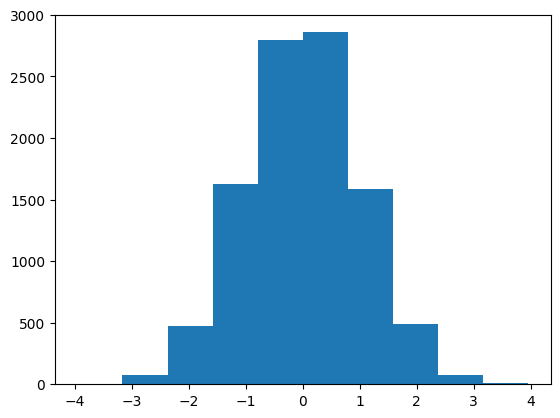

In [ ]:
plt.hist(x)
plt.show()

In [ ]:
np.size(x)

10

In [ ]:
ones = np.ones(10)

In [ ]:
X_fila = np.stack([x, ones], axis=0)

In [ ]:
X_fila

array([[ 2.10392623,  1.76009842, -1.64382919, -2.05534632,  0.00266896,
         0.45594255, -1.06265672,  0.18599824, -0.27432605, -0.14370508],
       [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ]])

In [ ]:
X = np.stack([x, ones], axis=1)

In [ ]:
X

array([[ 2.10392623,  1.        ],
       [ 1.76009842,  1.        ],
       [-1.64382919,  1.        ],
       [-2.05534632,  1.        ],
       [ 0.00266896,  1.        ],
       [ 0.45594255,  1.        ],
       [-1.06265672,  1.        ],
       [ 0.18599824,  1.        ],
       [-0.27432605,  1.        ],
       [-0.14370508,  1.        ]])

In [ ]:
X.shape

(10, 2)

### Usando notación de Matlab

In [ ]:
np.matrix?

In [ ]:
input_matrix = []

# Tuple
for xi, onesi in zip(x, ones):
  input_matrix.append("{} {}".format(xi, onesi))

X = np.matrix(";".join(input_matrix))

In [ ]:
X

array([[ 2.10392623,  1.        ],
       [ 1.76009842,  1.        ],
       [-1.64382919,  1.        ],
       [-2.05534632,  1.        ],
       [ 0.00266896,  1.        ],
       [ 0.45594255,  1.        ],
       [-1.06265672,  1.        ],
       [ 0.18599824,  1.        ],
       [-0.27432605,  1.        ],
       [-0.14370508,  1.        ]])

## Modelo teórico

In [ ]:
X

array([[ 2.10392623,  1.        ],
       [ 1.76009842,  1.        ],
       [-1.64382919,  1.        ],
       [-2.05534632,  1.        ],
       [ 0.00266896,  1.        ],
       [ 0.45594255,  1.        ],
       [-1.06265672,  1.        ],
       [ 0.18599824,  1.        ],
       [-0.27432605,  1.        ],
       [-0.14370508,  1.        ]])

In [ ]:
beta_star = np.array([3.0, 4.0])

In [ ]:
beta_star.shape

(2,)

In [ ]:
y = np.dot(X, beta_star)

In [ ]:
y

array([10.3117787 ,  9.28029527, -0.93148757, -2.16603896,  4.00800689,
        5.36782765,  0.81202984,  4.55799473,  3.17702186,  3.56888476])

y.size(

In [ ]:
type(y)

numpy.matrix

### viendo la componente $y_1$

In [ ]:
X

array([[ 2.10392623,  1.        ],
       [ 1.76009842,  1.        ],
       [-1.64382919,  1.        ],
       [-2.05534632,  1.        ],
       [ 0.00266896,  1.        ],
       [ 0.45594255,  1.        ],
       [-1.06265672,  1.        ],
       [ 0.18599824,  1.        ],
       [-0.27432605,  1.        ],
       [-0.14370508,  1.        ]])

In [ ]:
X[0]

array([2.10392623, 1.        ])

In [ ]:
X[0][0] * beta_star[0] + beta_star[1]

10.311778704198531

In [ ]:
X[0, 0]* beta_star[0] + beta_star[1]

10.311778704198531

## Buscar las soluciones usando las ecuaciones normales

### Objetivo

$\beta_* = (X^T X)^{-1} X^{T} y $

### Qué necesitamos?

1. Entender cómo calcular la inversa
1. Entender cómo calcular la traspuesta

In [ ]:
from numpy.linalg import inv as inversa


In [ ]:
def ecuaciones_ucv(X,  y):
  X_t = X.T
  Gram = X_t @ X
  Inv_Gram =  inversa(Gram)

  return Inv_Gram @ X_t @ y

In [ ]:
beta_star_ucv = ecuaciones_ucv(X=X, y=y)

In [ ]:
beta_star

array([3., 4.])

In [ ]:
beta_star_ucv

array([3., 4.])

## Solución vieja

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
def ecuaciones_normales_no(X, y):
  """
  :param X: La matriz de datos
  :param y: El vector de observaciones



  :returns: El vector beta estrella
  """

  return np.dot(np.dot(inversa(np.dot(X.T, X)), X.T, y))


In [ ]:
def ecuaciones_normales(X, y):
  """
  :param X: La matriz de datos
  :param y: El vector de observaciones



  :returns: El vector beta estrella
  """

  return inversa(X.T @ X) @ X.T @ y

In [ ]:
X @ beta_star

matrix([[1.3838734 , 2.4999652 , 4.96323258, 2.34687698, 1.23056921,
         6.30323856, 8.65505636, 1.07184366, 3.97303287, 3.32494805]])

### Transpuesta

In [ ]:
np.transpose(X)

matrix([[-0.8080633 , -0.2500174 ,  0.98161629, -0.32656151, -0.88471539,
          1.65161928,  2.82752818, -0.96407817,  0.48651643,  0.16247403],
        [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
          1.        ,  1.        ,  1.        ,  1.        ,  1.        ]])

In [ ]:
X.T

matrix([[-0.8080633 , -0.2500174 ,  0.98161629, -0.32656151, -0.88471539,
          1.65161928,  2.82752818, -0.96407817,  0.48651643,  0.16247403],
        [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
          1.        ,  1.        ,  1.        ,  1.        ,  1.        ]])

## Probando el método

In [ ]:
beta_star

array([2., 3.])

In [ ]:
y

matrix([[1.3838734 , 2.4999652 , 4.96323258, 2.34687698, 1.23056921,
         6.30323856, 8.65505636, 1.07184366, 3.97303287, 3.32494805]])

In [ ]:
y = y.reshape(10, 1)

In [ ]:
X

matrix([[ 0.21262992,  1.        ],
        [-1.4821317 ,  1.        ],
        [-0.02905379,  1.        ],
        [-0.31234722,  1.        ],
        [ 0.05402455,  1.        ],
        [ 1.69872219,  1.        ],
        [ 2.37489091,  1.        ],
        [-0.74516778,  1.        ],
        [-1.31825004,  1.        ],
        [-1.46539355,  1.        ]])

In [ ]:
ecuaciones_normales(X, y)

matrix([[2.],
        [3.]])

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
beta_star = beta_star.reshape(2, 1)

NameError: name 'beta_star' is not defined

In [ ]:
plt.plot(X[:, 0], X @ beta_star, X[:, 0], y, 'o')

NameError: name 'beta_star' is not defined

## Agregando ruido

In [ ]:
# np.random.randn ~ N(0, 1)  en clases vimos que el ruido N(0, sigma)
# Las columnas ahora siguen Y = 30 X + 10 + ruido
X = np.stack([np.random.randn(10), np.ones(10)], axis=1)

In [ ]:
X

array([[ 2.10392623,  1.        ],
       [ 1.76009842,  1.        ],
       [-1.64382919,  1.        ],
       [-2.05534632,  1.        ],
       [ 0.00266896,  1.        ],
       [ 0.45594255,  1.        ],
       [-1.06265672,  1.        ],
       [ 0.18599824,  1.        ],
       [-0.27432605,  1.        ],
       [-0.14370508,  1.        ]])

In [ ]:
beta_star

array([3., 4.])

### Sobrecarga de operadores

np.random.randn() -> un valor en R lo multiplico por 5

In [ ]:
y_ruido = X @ beta_star + 5*np.random.randn(10)

In [ ]:
y_ruido

array([ 10.36356951,   7.96278512, -17.60550131,   1.68194224,
         6.00096162,   5.38818279,   4.03167414,   3.99010087,
         5.61675531,   2.21159998])

In [ ]:
y

array([10.3117787 ,  9.28029527, -0.93148757, -2.16603896,  4.00800689,
        5.36782765,  0.81202984,  4.55799473,  3.17702186,  3.56888476])

In [ ]:
beta_star_nuevo = ecuaciones_ucv(X=X, y=y_ruido)

In [ ]:
beta_star_nuevo

array([3.80281374, 3.21946289])

In [ ]:
beta_star

array([3., 4.])

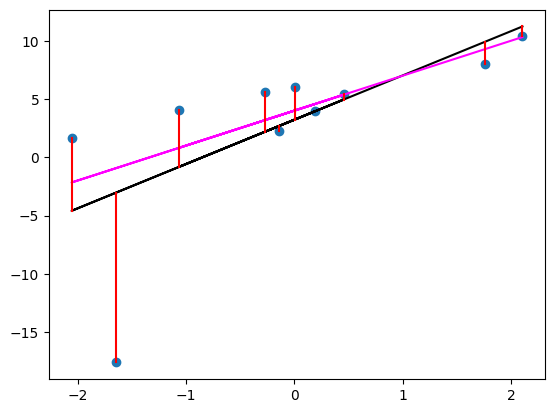

In [ ]:
plt.plot( X[:, 0], y_ruido, 'o')
plt.plot(X[:, 0], X @ beta_star_nuevo, color="black")
plt.plot(X[:, 0], X @  beta_star, color="magenta")
plt.plot(np.vstack([X[:, 0], X[:, 0]]), np.vstack([y_ruido, X @ beta_star_nuevo]), color="red")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
!mkdir hola

In [ ]:
import dash

In [ ]:
!pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 75.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 18.5 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3


En general, todos los objetos (names) de SK Learn tienen asociado el método fit (entrenar). Si es un problema de regresión o de clasificación buscamos $f(X) = y$ como tenemos nuestros datos $X$ y el vector de salidas $y$ el método siempre recibe ambas en ese orden.

In [ ]:
beta_star

array([3., 4.])

In [ ]:
beta_star_nuevo

array([3.80281374, 3.21946289])

In [ ]:
model = LinearRegression().fit(X, y)

### Tres opciones para generar el modelo usando SK Learn

In [ ]:
# Abre un menu al lado derecho con métodos, parámetros y ejemplos de uso del modelo

model?

In [ ]:
beta_star

array([3., 4.])

coef_ siempre tendrá los parámetros entrenamos de $\beta$ SIN el punto de corte

In [ ]:
model.coef_

array([3., 0.])

el punto de corte que en clases hemos llamado $\beta_0$ está en intercept_

In [ ]:
model.intercept_

4.0

La primera manera de entrenar es agregando la columna de 1s y quitando el intercept

In [ ]:
model1 = LinearRegression(fit_intercept=False).fit(X, y)

In [ ]:
model1.coef_

array([3., 4.])

In [ ]:
model1.intercept_

0.0

In [ ]:
X

array([[ 2.10392623,  1.        ],
       [ 1.76009842,  1.        ],
       [-1.64382919,  1.        ],
       [-2.05534632,  1.        ],
       [ 0.00266896,  1.        ],
       [ 0.45594255,  1.        ],
       [-1.06265672,  1.        ],
       [ 0.18599824,  1.        ],
       [-0.27432605,  1.        ],
       [-0.14370508,  1.        ]])

In [ ]:
model_ucv = LinearRegression(fit_intercept=True).fit(X[:, 0].reshape(10, 1), y)

In [ ]:
model_ucv.coef_

array([3.])

In [ ]:
model_ucv.intercept_

4.0

In [ ]:
model_ucv.coef_ * X[2, 0] + model_ucv.intercept_

array([-0.93148757])

In [ ]:
model_ucv.predict(X[:, 0].reshape(10, 1))

array([10.3117787 ,  9.28029527, -0.93148757, -2.16603896,  4.00800689,
        5.36782765,  0.81202984,  4.55799473,  3.17702186,  3.56888476])

La segunda manera de entrenar es usando solamente los datos relevantes (columna sin 1s) y el intercept tendrá el punto de corte porque fit_intercept no es False

In [ ]:
model3 = LinearRegression().fit(X[:, 0].reshape(1000, 1), y)

In [ ]:
model3.coef_

array([29.93435641])

In [ ]:
model3.intercept_

9.913656812204634

Por último, el $\beta^*$ lo podemos crear concatenando ambos valores. Sin embargo, TAREA: existe una manera de obtener el modelo como parámetro.

In [ ]:
beta_star_scikit = np.array([model3.coef_[0], model3.intercept_])

In [ ]:
beta_star_scikit

array([29.99734383, 10.02701086])

Nos da el mismo modelo que usando las ecuaciones normales

In [ ]:
array([29.99734383, 10.02701086])

### Comentarios

1. No nos da 30, 10 exactamente por el ruido asociado.
1. Si el ruido asociado sigue N(0, sigma) entonces regresión lineal debería funcionar bien
1. Si el ruido asociado NO es normal, no va a funcionar bien.

## Cómo sabemos que un modelo "es bueno"?

Gráfico tomado de [Coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination)

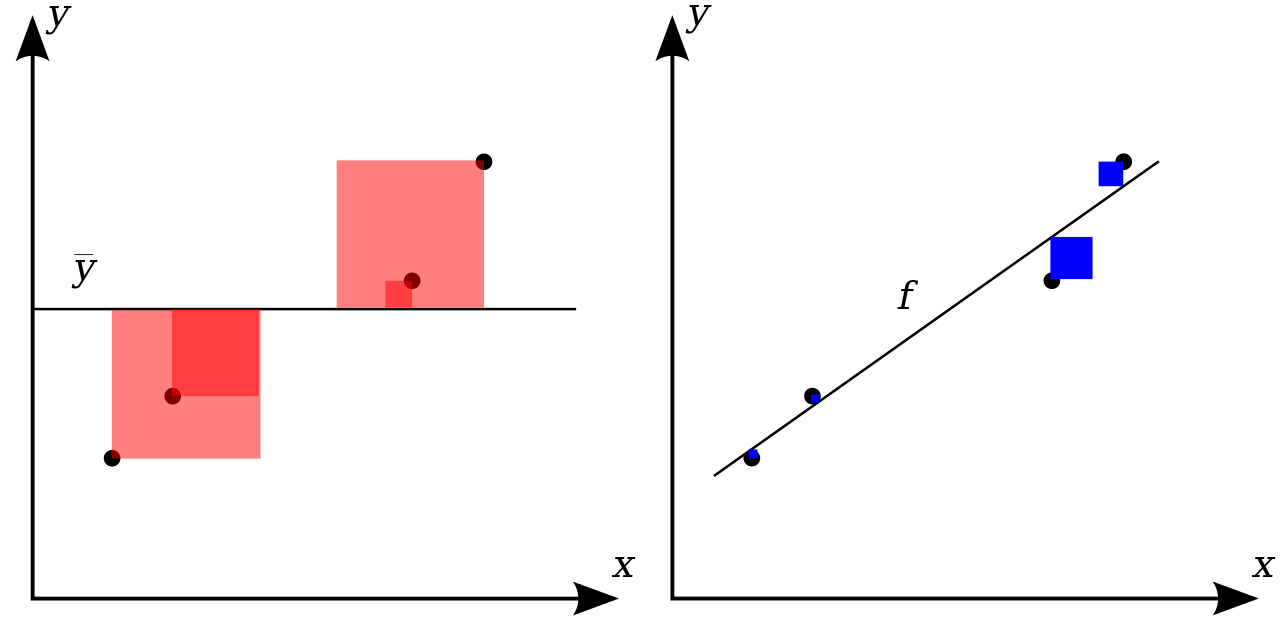

$$R^2=1-\frac{\color{blue}{S S_{\mathrm{res}}}}{\color{red}{S S_{\mathrm{tot}}}}$$

De donde $$\color{blue}{S S_{\mathrm{res}}} = \sum_i\left(y_i-f(x_i)\right)^2=\sum_i e_i^2  $$ y $$\color{red}{S S_{\mathrm{tot}}} = S S_{\mathrm{tot}}=\sum_i\left(y_i-\bar{y}\right)^2 $$

1. Vean como el denominador es **constante** para todos los posibles modelos!
1. Cuáles son los posibles valores de $R^2$

